# CHAPTER 3 & 4

# Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico

## STEPHEN KINUTHIA KINYURU IN16/00004/20

## MIKE MGHENYI KILILO IN16/00036/20

This work presents data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 

The dataset used in this activity was sourced from kaggle. This data can be used to generate intelligent computational tools to identify the obesity level of an individual and to build recommender systems that monitor obesity levels. For discussion and more information of the dataset creation, please refer to the full-length article “Obesity Level Estimation Software based on Decision Trees”.

In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



import xgboost as xgb


# Attributes related with eating habits are:

Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC), 

Number of main meals (NCP),

Consumption of food between meals (CAEC), 

Consumption of water daily (CH20),

and Consumption of alcohol (CALC).

# Attributes related with the physical condition are:

Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS),

# Other variables were:

Gender, Age, Height and Weight.

Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, based on Equation (1) and information from WHO and Mexican Normativity.

Data is available in CSV format and ARFF format 

In [79]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Spoiler Alert:No Missing Values.

In [80]:
print(f"data shape: {df.shape}")

data shape: (2111, 17)


### Filter rows with age less than 18

In [81]:
df = df[df['Age'] >= 18]

In [82]:
print(f"data shape: {df.shape}")

data shape: (1998, 17)


In [83]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,24.725786,1.701044,87.915399,2.424968,2.676815,2.010469,0.990090,0.638292
std,6.271890,0.093134,26.091561,0.533031,0.766883,0.615969,0.841901,0.605196
min,18.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.393019,1.630000,68.457437,2.000000,2.668225,1.569359,0.112436,0.000000
50%,23.000000,1.700029,84.378461,2.393251,3.000000,2.000000,1.000000,0.585973
75%,26.000000,1.767135,108.990150,3.000000,3.000000,2.496789,1.609904,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


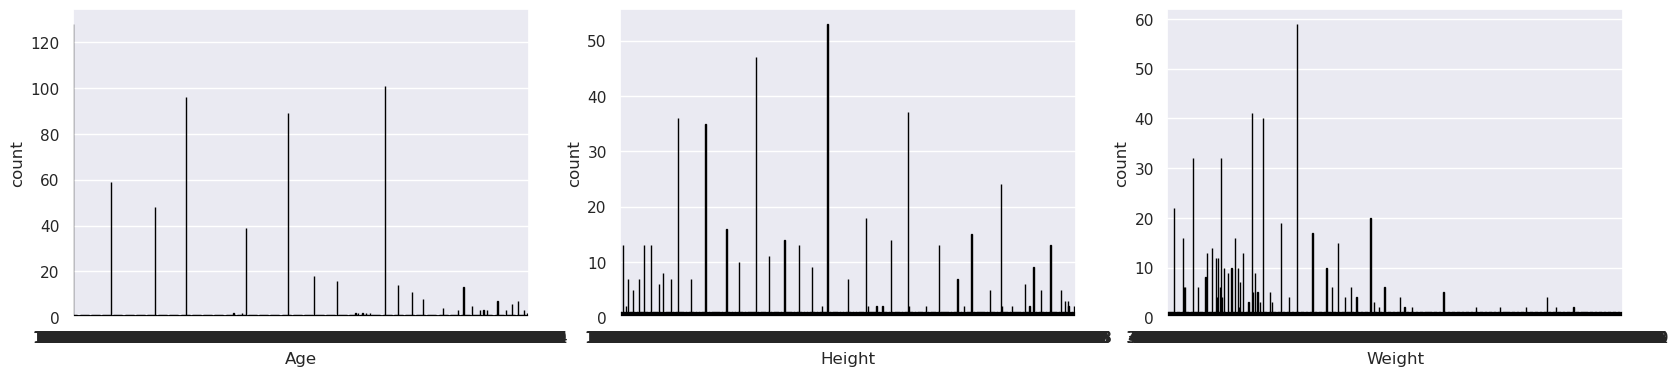

In [84]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'Age', data = df, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'Height', data = df, palette="flag",edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'Weight', data = df, palette="Greens_r",edgecolor="black")
plt.show()

In [85]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

/home/creed/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



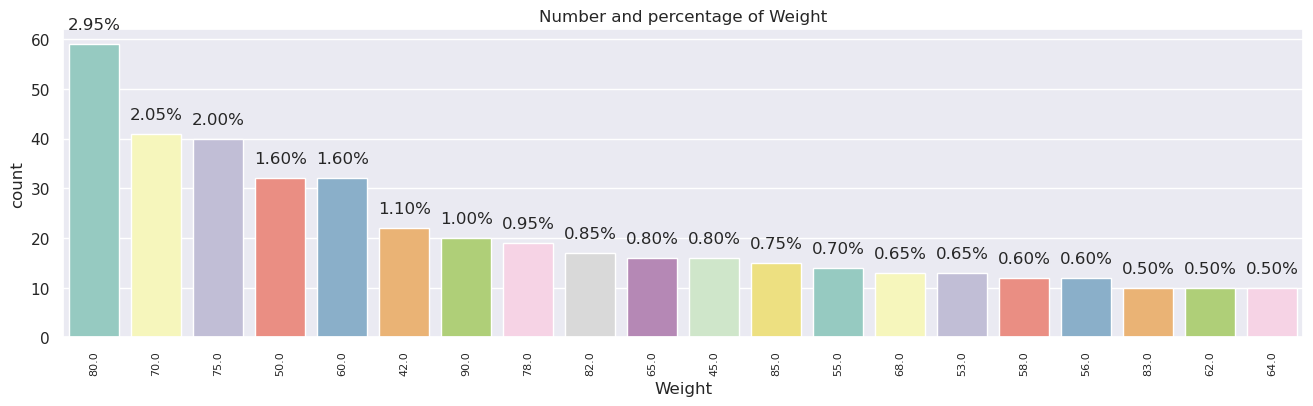

In [86]:
plot_count("Weight", "Weight", df,4)

### Univariate analysis

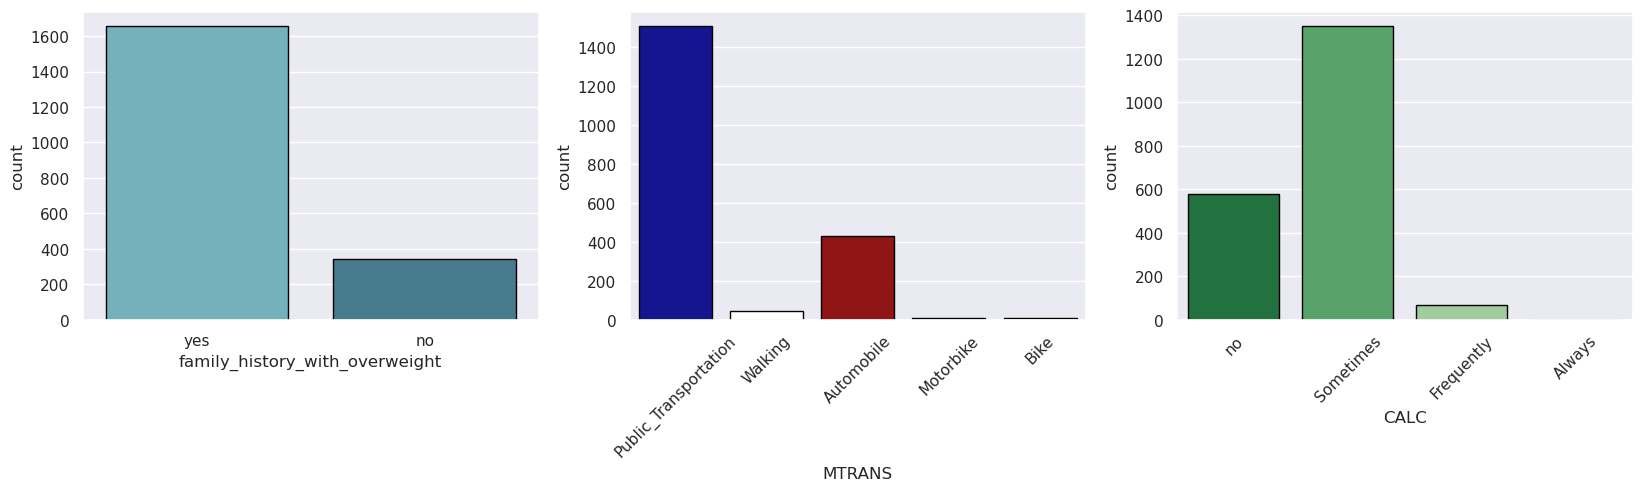

In [87]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = df, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'MTRANS', data = df, palette="flag",edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'CALC', data = df, palette="Greens_r",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

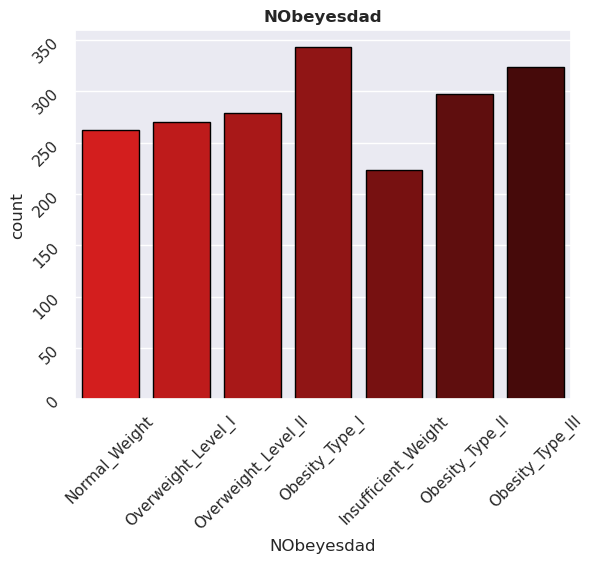

In [88]:
sns.countplot(x="NObeyesdad",data=df,palette="flag",edgecolor="black")
plt.title('NObeyesdad', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.set(font_scale=1)

### Bivariate analysis

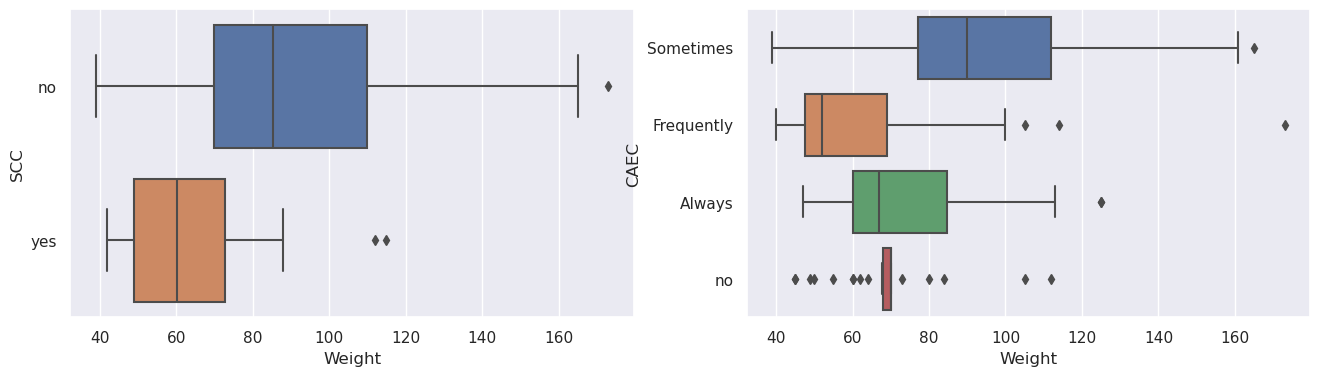

In [89]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'SCC', data = df)
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'CAEC', data = df)
plt.show()

/home/creed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/creed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/creed/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



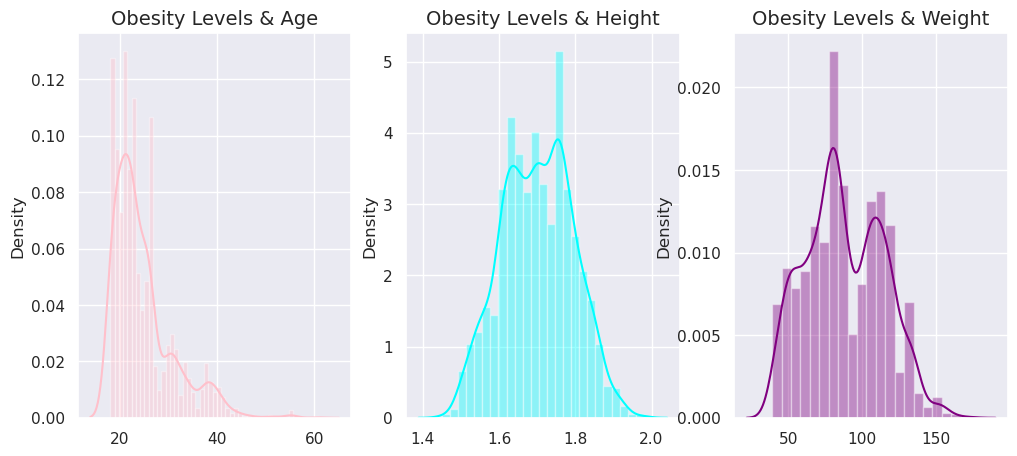

In [90]:
# Distribution of different type of amount
fig , ax = plt.subplots(1,3,figsize = (12,5))

Age = df.Age.values
Height= df.Height.values
Weight = df.Weight.values

sns.distplot(Age , ax = ax[0] , color = 'pink').set_title('Obesity Levels & Age' , fontsize = 14)
sns.distplot(Height , ax = ax[1] , color = 'cyan').set_title('Obesity Levels & Height' , fontsize = 14)
sns.distplot(Weight , ax = ax[2] , color = 'purple').set_title('Obesity Levels & Weight' , fontsize = 14)


plt.show()

model_a_data = [0.85, 0.75, 0.9]  # Metrics 1, 2, and 3 for Model A
model_b_data = [0.9, 0.8, 0.85]  # Metrics 1, 2, and 3 for Model B

In [91]:
import plotly.express as px
fig = px.line(df, x="Weight", y="TUE", color_discrete_sequence=['darksalmon'], 
              title="Obesity Levels and the Use of Technology")
fig.show()

### below is data preprocessing the dataset by encoding categorical variables, handling missing values, and splitting it into training and testing sets

In [92]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['family_history_with_overweight'] = encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = encoder.fit_transform(df['FAVC'])
df['FCVC'] = encoder.fit_transform(df['FCVC'])
df['CAEC'] = encoder.fit_transform(df['CAEC'])
df['SMOKE'] = encoder.fit_transform(df['SMOKE'])
df['SCC'] = encoder.fit_transform(df['SCC'])
df['CALC'] = encoder.fit_transform(df['CALC'])
df['MTRANS'] = encoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = encoder.fit_transform(df['NObeyesdad'])

In [93]:
print(df.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


### Handle missing values


In [94]:
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

/home/creed/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



### Split dataset into training and testing sets

In [95]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train decision tree classifier


In [96]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Make predictions on testing set

In [97]:
y_pred = clf.predict(X_test)

### Evaluate performance

In [98]:
accuracy = accuracy_score(y_test, y_pred)
# Make predictions on test data
y_pred = clf.predict(X_test)

# Calculate recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy}')
print("Recall score: ", recall)
print("F1 score: ", f1)

decision_tree_metrics = [accuracy, recall, f1]


Accuracy: 0.9225
Recall score:  0.9225
F1 score:  0.9229180040633487


### Random forest before feature selection

In [99]:
# Split the data into train and test sets
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the performance metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 Score:', f1)

decision_tree_metrics

Accuracy: 0.95
Precision: 0.9487403307075438
Recall: 0.9473782887451341
F1 Score: 0.9478344698294962


[0.9225, 0.9225, 0.9229180040633487]

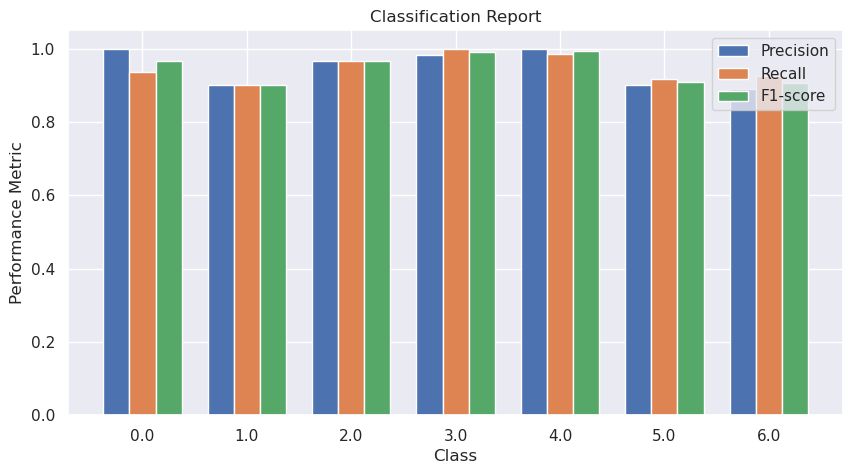

In [100]:
# Train a Random Forest Classifier with default parameters
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
# Predict on test set
# y_pred = model.predict(X_test)

# Calculate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall and f1-score for each class
precision = [report[label]['precision'] for label in report.keys() if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg']
recall = [report[label]['recall'] for label in report.keys() if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg']
f1_score = [report[label]['f1-score'] for label in report.keys() if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg']
labels = [label for label in report.keys() if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg']

# Plot bar graph
fig, ax = plt.subplots(figsize=(10,5))
x = range(len(labels))
ax.bar(x, precision, width=0.25, label='Precision')
ax.bar([i+0.25 for i in x], recall, width=0.25, label='Recall')
ax.bar([i+0.5 for i in x], f1_score, width=0.25, label='F1-score')
ax.set_xticks([i+0.25 for i in x])
ax.set_xticklabels(labels)
ax.set_xlabel('Class')
ax.set_ylabel('Performance Metric')
ax.set_title('Classification Report')
ax.legend()
plt.show()
#

### Feature selection

In [102]:
# Select features and target variable
X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

# Convert target variable to integer type using Label Encoding
le = LabelEncoder()
y = le.fit_transform(y)

# Convert categorical variables to integer type using One-Hot Encoding
encoder = OneHotEncoder()
X = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=['object'])).toarray())
X = pd.concat([X, df.select_dtypes(exclude=['object'])], axis=1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for train and test sets
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# Set parameters
params = {'objective': 'multi:softmax', 'num_class': 7}

# Train the model
xgb_model = xgb.train(params=params, dtrain=dtrain)

# Predict on the test data
y_pred = xgb_model.predict(dtest)

# Print performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9975


### decision tree after feature selection

In [103]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate the performance metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 Score:', f1)


TypeError: 'list' object is not callable

### Random forect classification after feature selection

In [104]:
# Train a Random Forest Classifier with default parameters
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print("Accuracy:", accuracy)
print(f"Accuracy: {accuracy_percent:.2f}%")

Accuracy: 0.95
Accuracy: 95.00%


### Recal score and the F1 score after feature selection

In [105]:

# Make predictions on test data
y_pred = clf.predict(X_test)

# Calculate recall score
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Recall score: ", recall)
print("F1 score: ", f1)


TypeError: 'list' object is not callable

### Calculating precision for the dataset using the trained random forest classifier

In [106]:
# make predictions on the test set
y_pred = clf.predict(X_test)

# calculate precision score
precision = precision_score(y_test, y_pred, average='weighted')
precision_percent = precision * 100
print(f"Precision Score in percentage: {precision_percent:.3f}%")

Precision Score in percentage: 95.084%


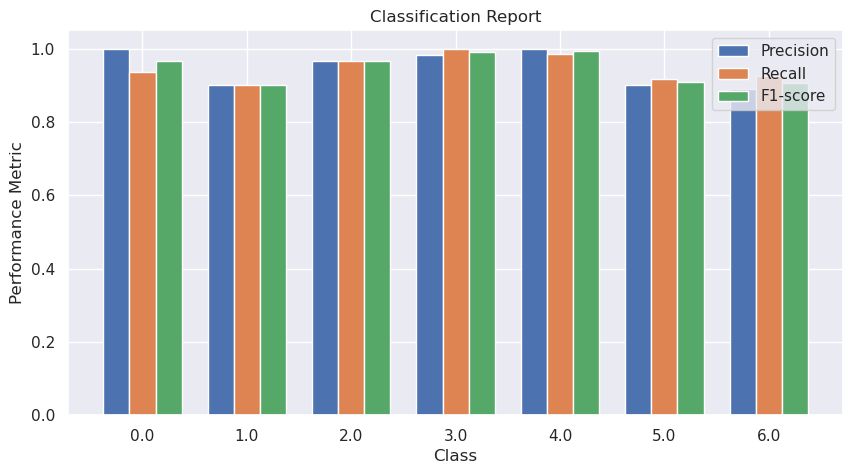

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Train a Random Forest Classifier with default parameters
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
# Predict on test set
# y_pred = model.predict(X_test)

# Calculate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall and f1-score for each class
precision = [report[label]['precision'] for label in report.keys() if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg']
recall = [report[label]['recall'] for label in report.keys() if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg']
f1_score = [report[label]['f1-score'] for label in report.keys() if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg']
labels = [label for label in report.keys() if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg']

# Plot bar graph
fig, ax = plt.subplots(figsize=(10,5))
x = range(len(labels))
ax.bar(x, precision, width=0.25, label='Precision')
ax.bar([i+0.25 for i in x], recall, width=0.25, label='Recall')
ax.bar([i+0.5 for i in x], f1_score, width=0.25, label='F1-score')
ax.set_xticks([i+0.25 for i in x])
ax.set_xticklabels(labels)
ax.set_xlabel('Class')
ax.set_ylabel('Performance Metric')
ax.set_title('Classification Report')
ax.legend()
plt.show()


/home/creed/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/home/creed/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



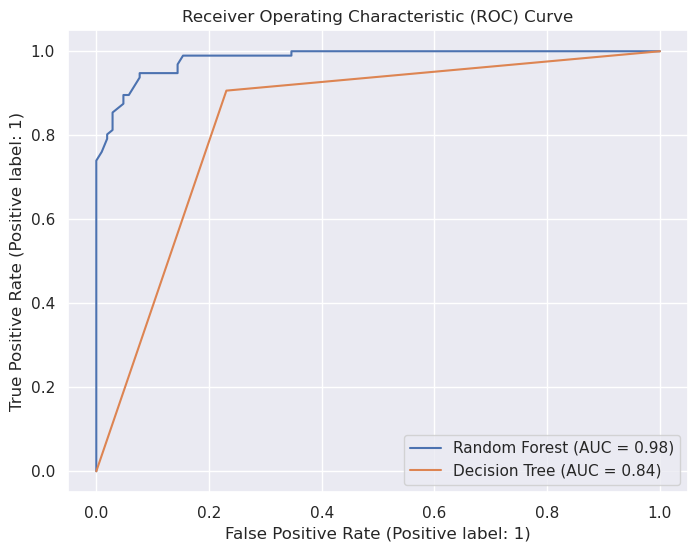

/home/creed/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/home/creed/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



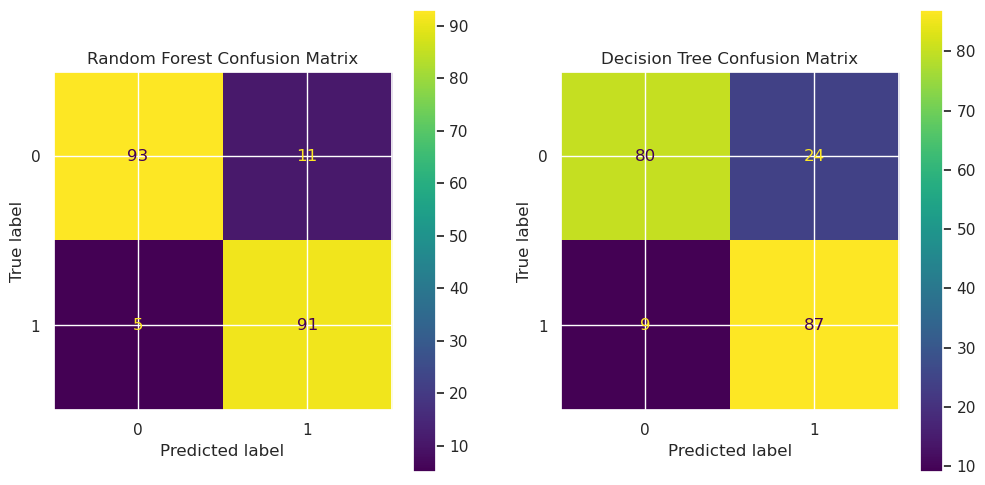

In [110]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

# Load dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(rf_model, X_test, y_test, ax=ax, name='Random Forest')
plot_roc_curve(dt_model, X_test, y_test, ax=ax, name='Decision Tree')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot confusion matrix
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
plot_confusion_matrix(rf_model, X_test, y_test, ax=ax1)
ax1.set_title('Random Forest Confusion Matrix')
plot_confusion_matrix(dt_model, X_test, y_test, ax=ax2)
ax2.set_title('Decision Tree Confusion Matrix')
plt.show()


## Summary

In this activity, we have worked with a dataset containing information on various health factors of individuals such as age, weight, height, and lifestyle, to predict their obesity level.

We started by importing the required libraries and loading the dataset into a Pandas dataframe. After performing some initial data exploration and preprocessing steps, we divided the dataset into a training set and a test set.

Next, we implemented two different classification algorithms, namely Decision Tree and Random Forest, to predict the obesity level of individuals in the dataset. We selected Random Forest as the better-performing algorithm based on the accuracy and performance metrics calculated on the test set.

We also performed feature selection using the SelectKBest method from the scikit-learn library, which helped us identify the top 5 most important features for predicting obesity levels.

Finally, we calculated precision, recall, and F1 score for the Random Forest model, which provided us with more insight into the model's performance. Overall, this exercise gave us a good understanding of the classification problem and the steps involved in building and evaluating a predictive model.